# Customer Churn Rate Analysis
## by Fares Ahmed

## Preliminary Wrangling

> A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

> I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

> Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import cufflinks as cf
cf.go_offline()

%matplotlib inline
pd.set_option('max_columns', None)
mpl.rcParams['font.size'] = 12

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
df.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

### What is the structure of your dataset?

> The data set has 23 variables 'we will remove some of them' and 10127 observations with 0 null values.

### What is/are the main feature(s) of interest in your dataset?

> We are here to determine which variables affect the churn rate the most, so 'Attrition_Flag' is our main interest to check it's dependance on the other collumns.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We really can't say for sure but I guess 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' will hold a lot of influence on 'Attrition_Flag'

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

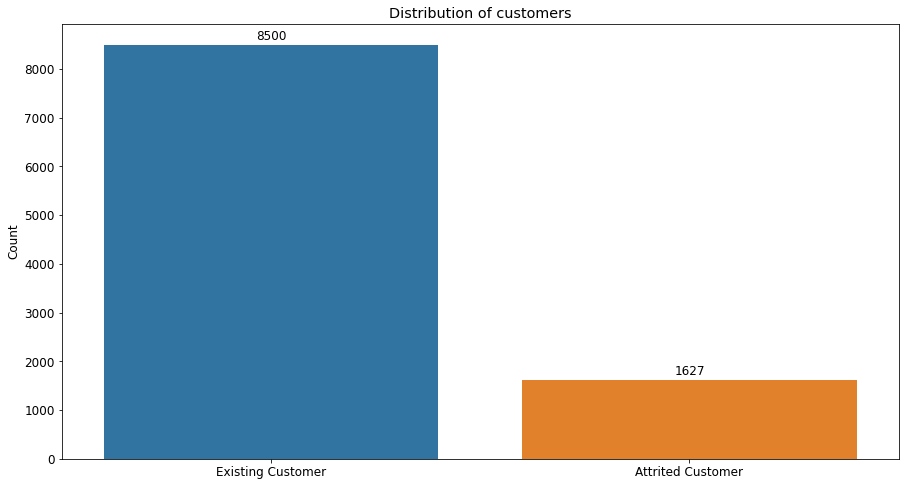

In [5]:
#sns.countplot(df['Attrition_Flag'])
labels=df['Attrition_Flag'].value_counts().index
values=df['Attrition_Flag'].value_counts().values

plt.figure(figsize = (15, 8))
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 100, values[i],ha="center")
plt.ylabel('Count')
plt.title('Distribution of customers');

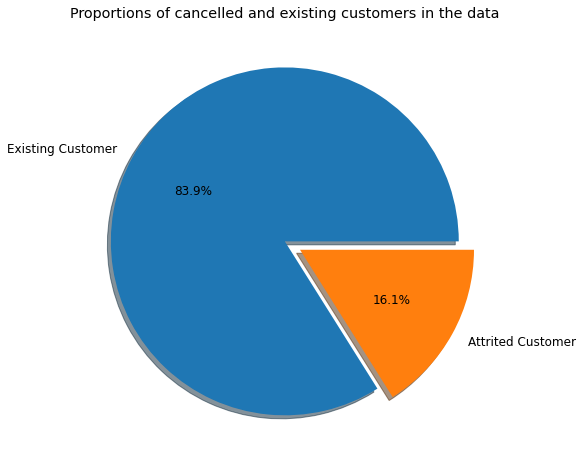

In [6]:
plt.figure(figsize = (15, 8))
df['Attrition_Flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, label='');
plt.title('Proportions of cancelled and existing customers in the data');

> A big chunk of the data is 'Existing Customer' which might be a bit problematic in our analysis and/or machine learning.

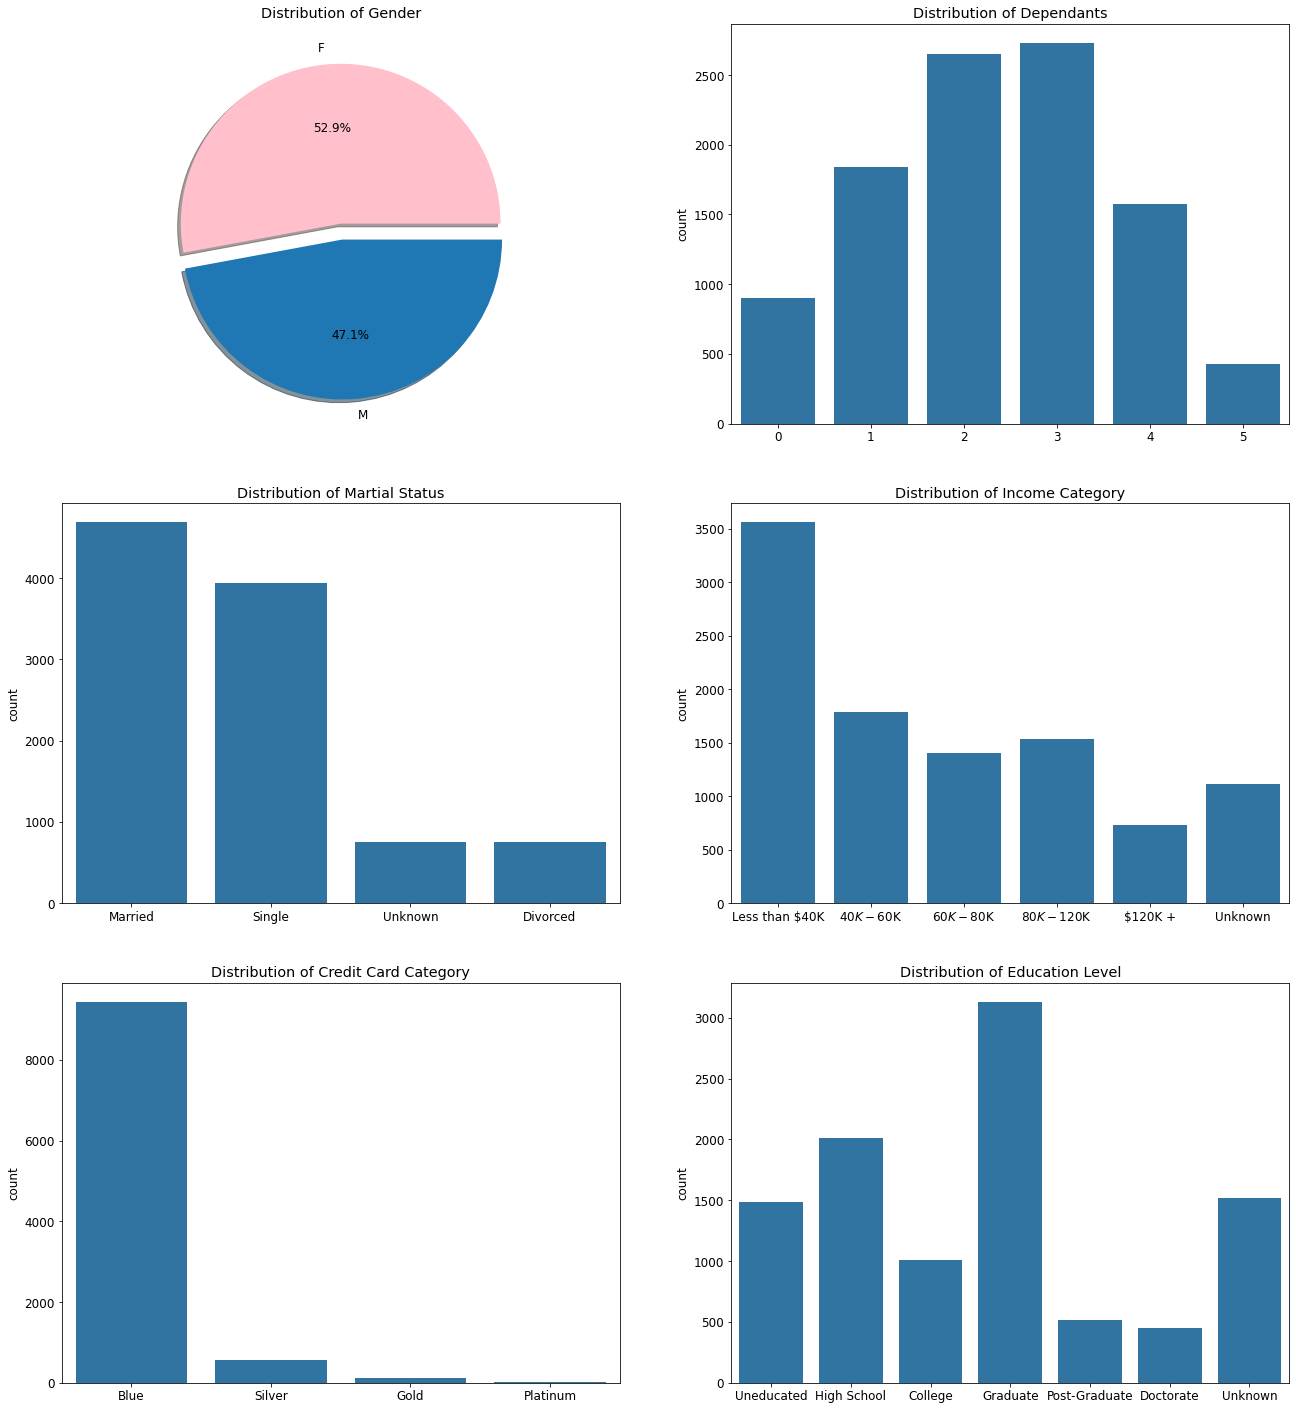

In [7]:
f,ax=plt.subplots(3,2,figsize=(22,25))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0],shadow=True,colors=['pink',sns.color_palette()[0]],label='');
sns.countplot(df.Dependent_count,ax=ax[0,1],color=sns.color_palette()[0]);
sns.countplot(df.Marital_Status,ax=ax[1,0],color=sns.color_palette()[0]);
sns.countplot(df.Income_Category,ax=ax[1,1],color=sns.color_palette()[0],order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown']);
sns.countplot(df.Card_Category,ax=ax[2,0],color=sns.color_palette()[0],order=['Blue','Silver','Gold', 'Platinum']);
sns.countplot(df.Education_Level,ax=ax[2,1],color=sns.color_palette()[0],order=['Uneducated','High School' ,'College' ,'Graduate' ,'Post-Graduate' ,'Doctorate' ,'Unknown']);

ax[0,0].set_title('Distribution of Gender');
ax[0,1].set_title('Distribution of Dependants');
ax[1,0].set_title('Distribution of Martial Status');
ax[1,1].set_title('Distribution of Income Category');
ax[2,0].set_title('Distribution of Credit Card Category');
ax[2,1].set_title('Distribution of Education Level');

for x in range(3):
    for y in range(2):
        ax[x,y].set_xlabel('')

> Gender is distributed almost equally so checking whether it has an effect is a no brainer.

> Most of the customers have dependants that they care for, having 2 or 3 is the most prominent.

> As for the maritial status, there are some cutomers with unknown status which needs to be removed when checking maritial status.

> Same goes for income category, some customers have unknown category.

> As expected almost all of the dataset lies in the standard card category with less and less customers the more luxurious the card tier is.

> Some unknown values again in education level.

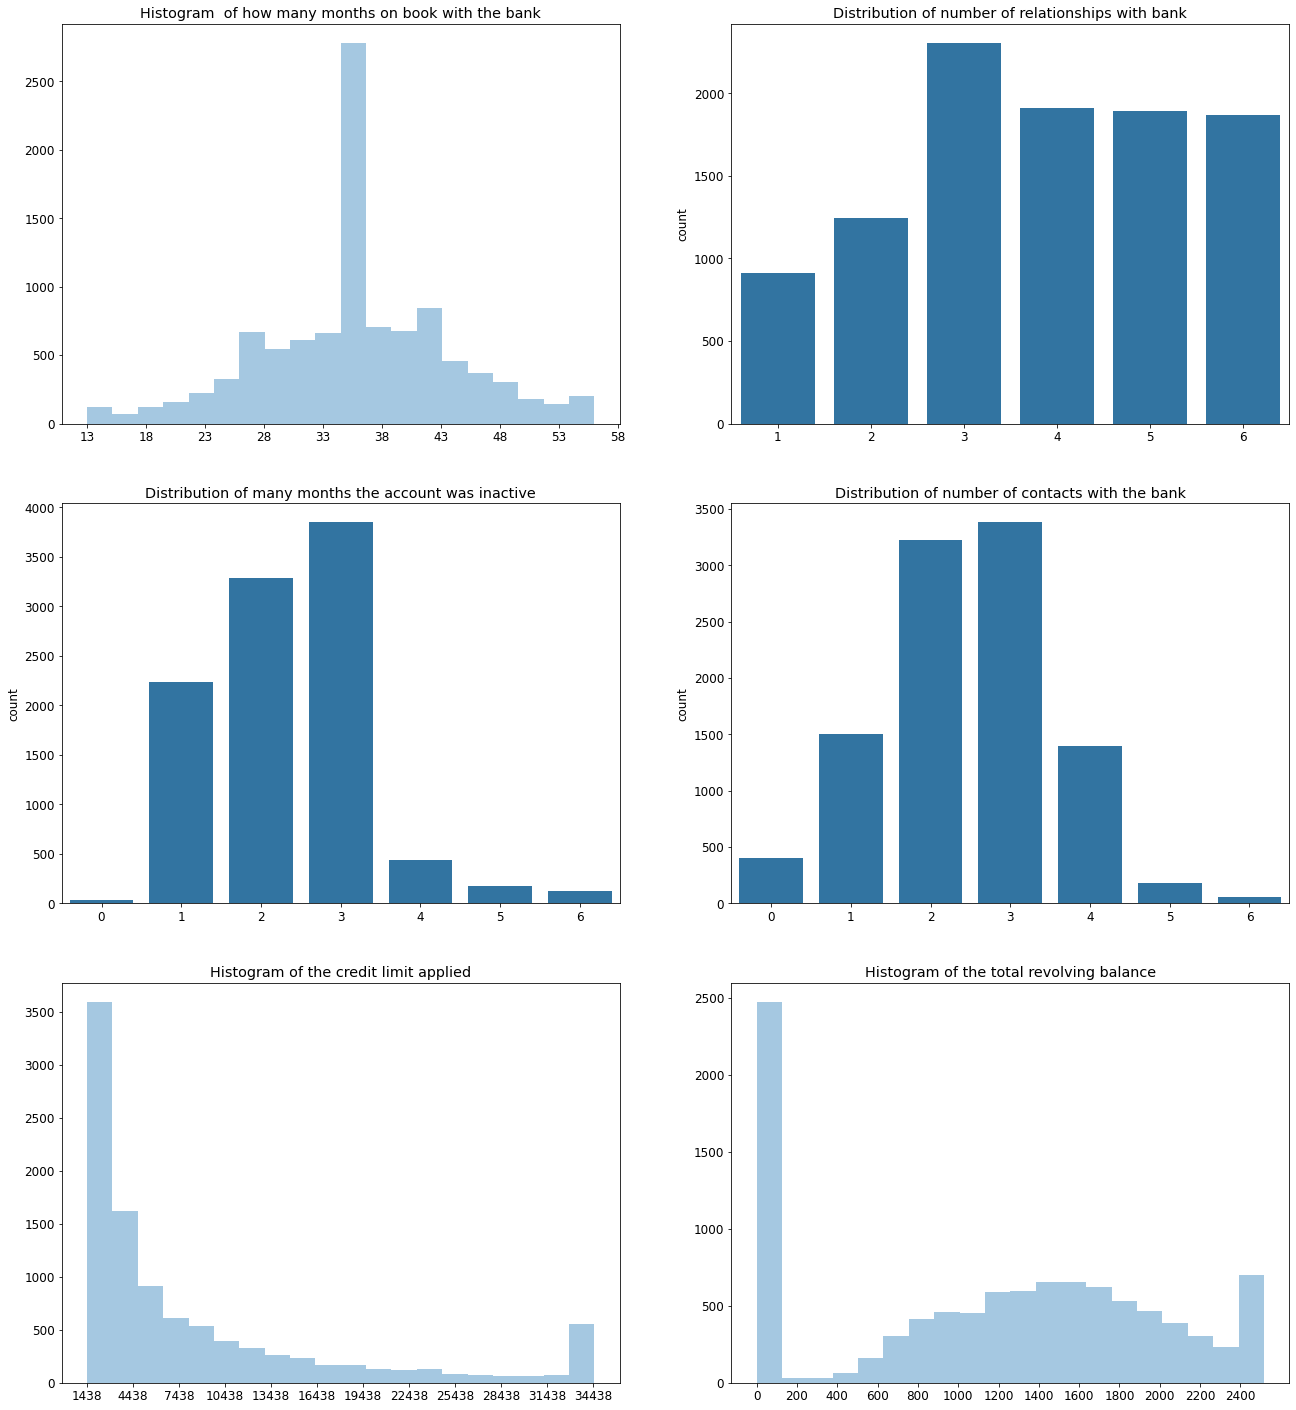

In [8]:
f,ax=plt.subplots(3,2,figsize=(22,25))
sns.distplot(df.Months_on_book,ax=ax[0,0],bins=20,kde=False)
sns.countplot(df.Total_Relationship_Count,ax=ax[0,1],color=sns.color_palette()[0]);
sns.countplot(df.Months_Inactive_12_mon,ax=ax[1,0],color=sns.color_palette()[0]);
sns.countplot(df.Contacts_Count_12_mon,ax=ax[1,1],color=sns.color_palette()[0]);
sns.distplot(df.Credit_Limit,ax=ax[2,0],bins=20,kde=False);
sns.distplot(df.Total_Revolving_Bal,ax=ax[2,1],bins=20,kde=False);

ax[0,0].set_xticks(np.arange(min(df.Months_on_book), max(df.Months_on_book)+5, 5));
ax[2,0].set_xticks(np.arange(min(df.Credit_Limit), max(df.Credit_Limit)+500, 3000));
ax[2,1].set_xticks(np.arange(min(df.Total_Revolving_Bal), max(df.Total_Revolving_Bal)+10, 200));

ax[0,0].set_title('Histogram  of how many months on book with the bank');
ax[0,1].set_title('Distribution of number of relationships with bank');
ax[1,0].set_title('Distribution of many months the account was inactive');
ax[1,1].set_title('Distribution of number of contacts with the bank');
ax[2,0].set_title('Histogram of the credit limit applied');
ax[2,1].set_title('Histogram of the total revolving balance');

for x in range(3):
    for y in range(2):
        ax[x,y].set_xlabel('')

> Months on book mostly range between 25 and 43 but there is a spike around 36 months which needs a closer look.

> Number of relationships doesn't look that interesting on it's own but maybe with a hue applied a different story will florish.

> As for the number of months the account was inactive the maximum was 6 but 1-3 months was the most frequent inactivity period.

> Same goes for number of contacts the maximum is 6 but most of the data lies in 2-3 months.

> As expected almost all of the dataset lies to the lower end (right skewed) with a spike at the end of the graph.

> Again a huge spike at the lower end then it increases a bit to around 1500 but then sinks again with another spike at the end of the graph.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> A couple of points needs to be further checked why are there these spikes but there wasn't any weird outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some features were not needed so they were dropped, but the data was clean and tidy so cleansing and/or wrangling wasn't much needed except changing the data type of Attrition_Flag to int64 for easier bivariate plots.

In [9]:
# dropping unneeded features
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [10]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
def change_to_bool(x):
    if x == 'Existing Customer':
        return 1
    else:
        return 0

In [12]:
df.Attrition_Flag = df.Attrition_Flag.apply(change_to_bool)
df.rename(columns={"Attrition_Flag": "Existing_Customer"},inplace=True)

In [13]:
df.Months_on_book.value_counts().head()

36    2463
37     358
34     353
38     347
39     341
Name: Months_on_book, dtype: int64

The spike turned out to be for 36 months which is exactly 3 years so that explains it.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Existing_Customer         10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
numeric = list(df.select_dtypes(include=['int64','float']).columns)
numeric.remove('CLIENTNUM')

In [16]:
df[numeric].sample(5)

,Existing_Customer,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9958,1,56,2,52,6,2,2,23362.0,1453,21909.0,0.848,15399,116,0.841,0.062
3933,1,47,3,42,4,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2676,1,49,3,44,3,1,5,15027.0,0,15027.0,0.811,3533,59,0.788,0.000
5708,1,47,3,42,5,3,2,8856.0,1433,7423.0,0.811,5072,77,0.711,0.162
2179,1,54,1,43,3,3,2,5839.0,2130,3709.0,0.687,1640,44,0.333,0.365


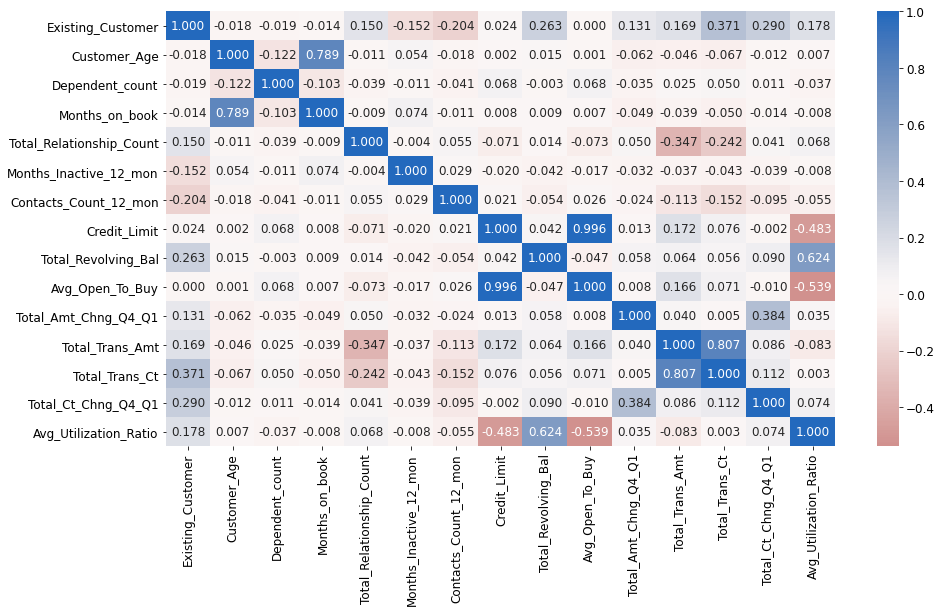

In [17]:
plt.figure(figsize = [15, 8])
sns.heatmap(df[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

> Looking at Rxisting_Customer and it's correlation with all features, we find that 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' are the the most correlated and we will give it a closer look.

In [18]:
#dividing numeric features for better visibility
a = numeric[:8]
b = numeric[8:]
b.insert(0,numeric[0])

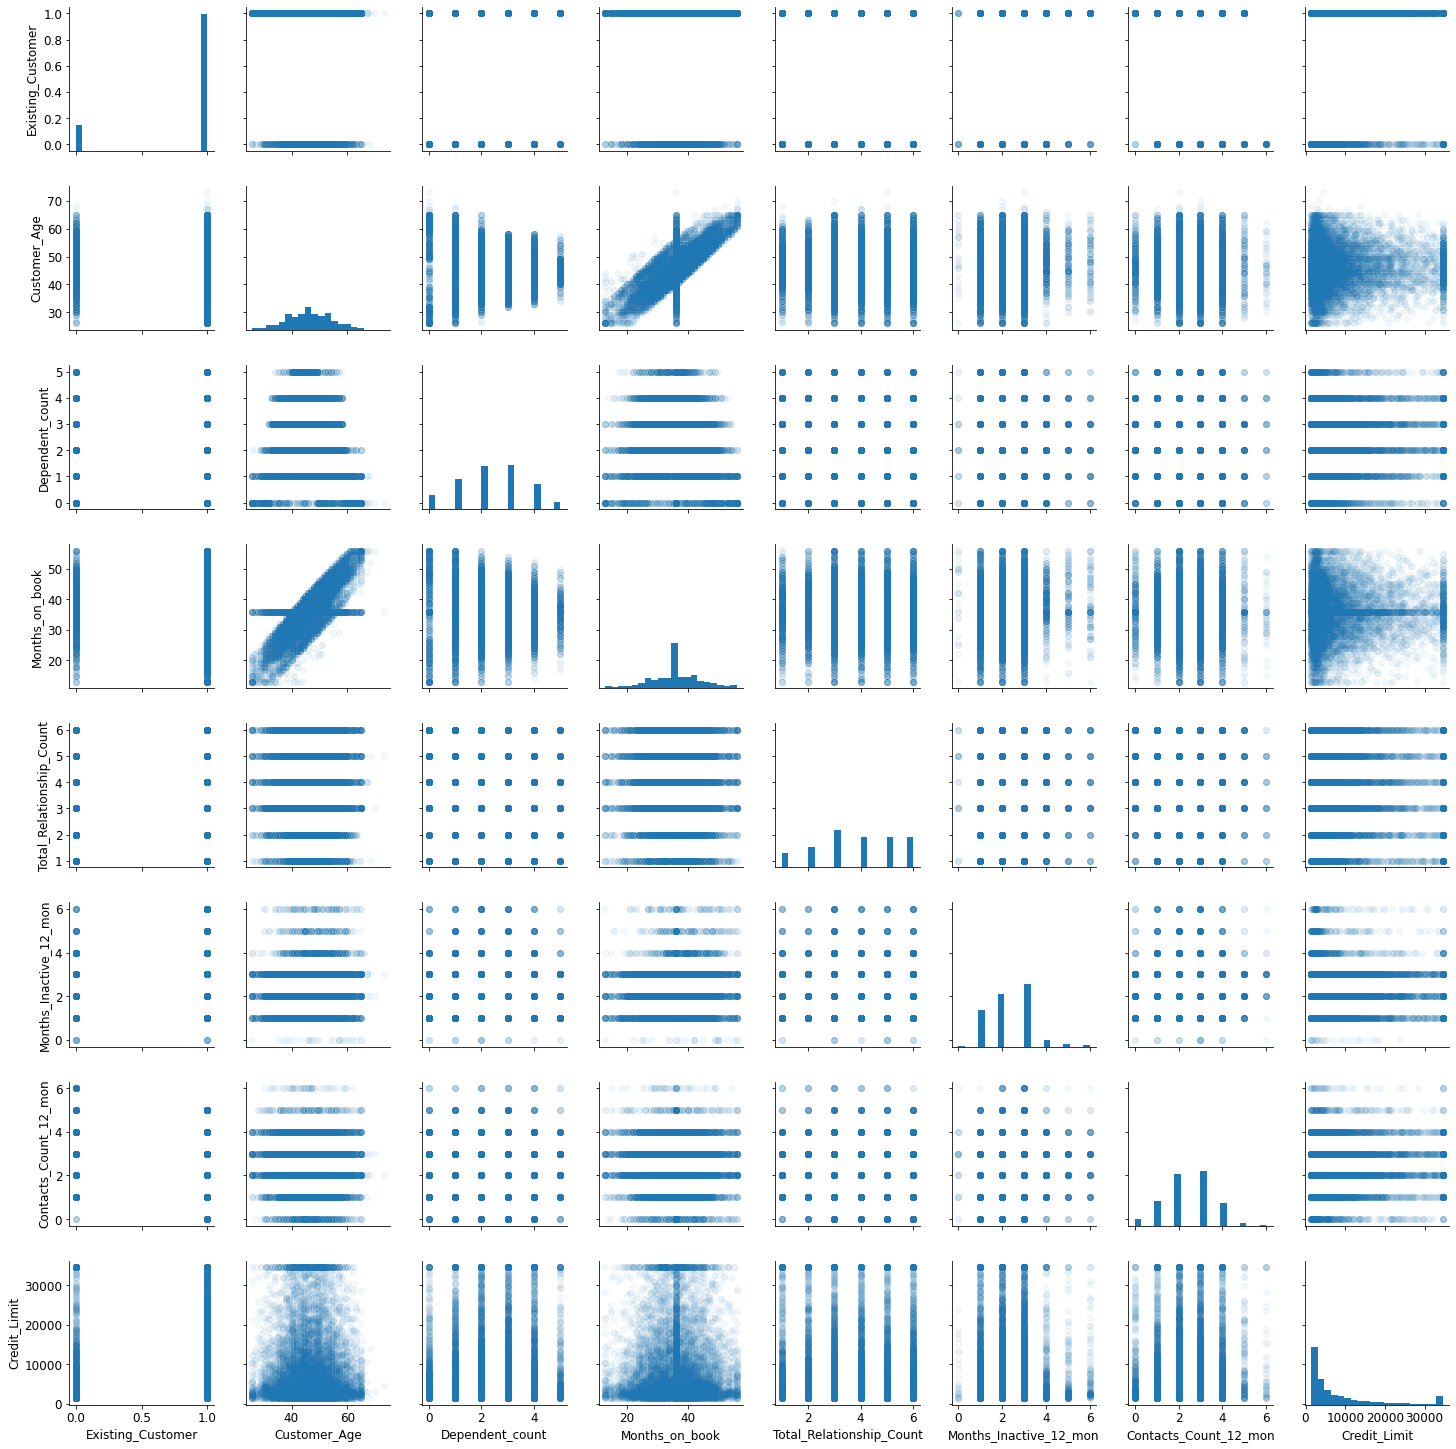

In [19]:
g = sns.PairGrid(data = df, vars = a);
g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter,alpha=0.05);

> Since the data isn't balanced, scatterplots didn't show much but we can see that if the number of contacts is increasing the customer is more probably going to cancel.

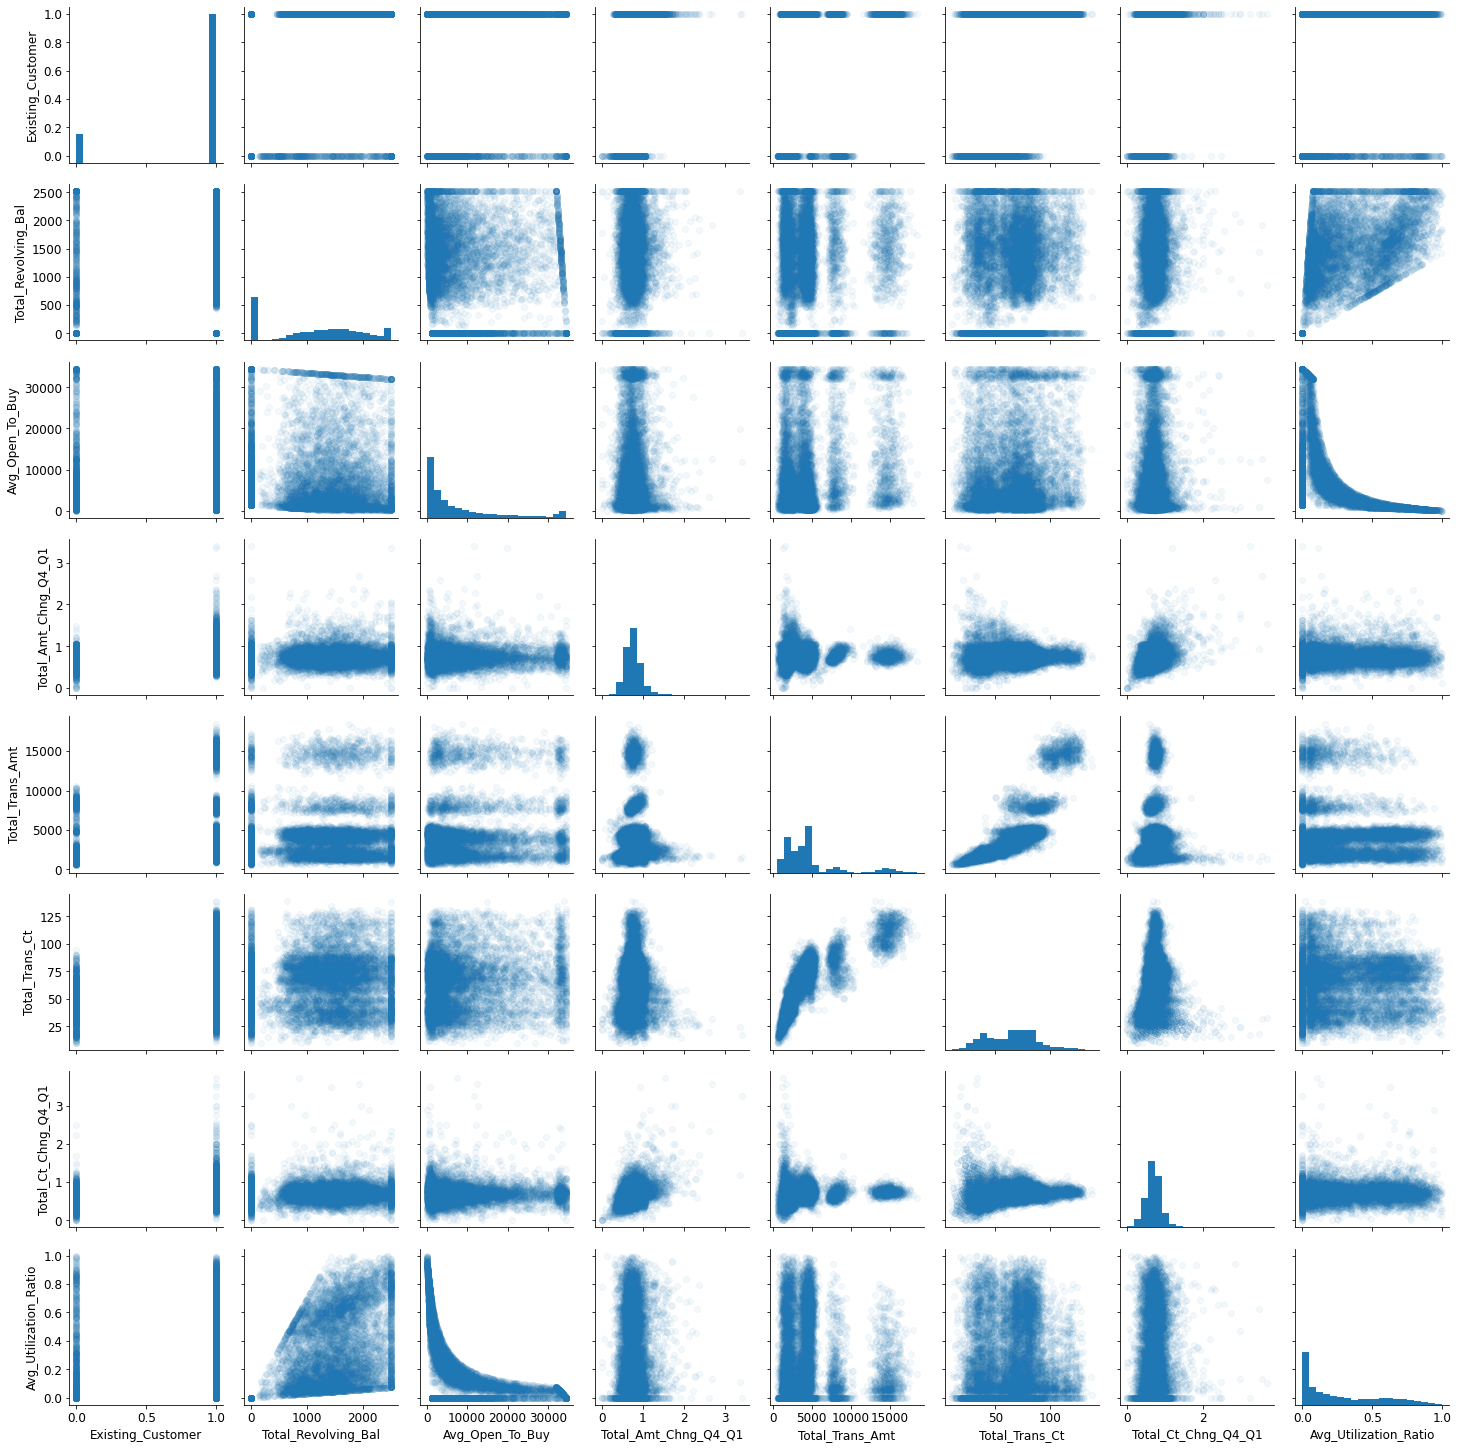

In [20]:
g = sns.PairGrid(data = df, vars = b);
g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter,alpha=0.05);

> Here we can see some insight which is in the 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1' features conclude that the higher these values the higher chance the customer will continue using our service.

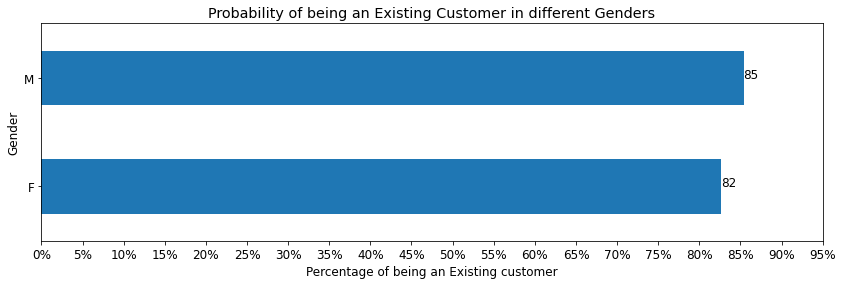

In [21]:
f = df[['Gender','Existing_Customer']].groupby(['Gender']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(y) for y in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False);
plt.title('Probability of being an Existing Customer in different Genders');
plt.xlabel('Percentage of being an Existing customer');

> The difference is almost negligible. 

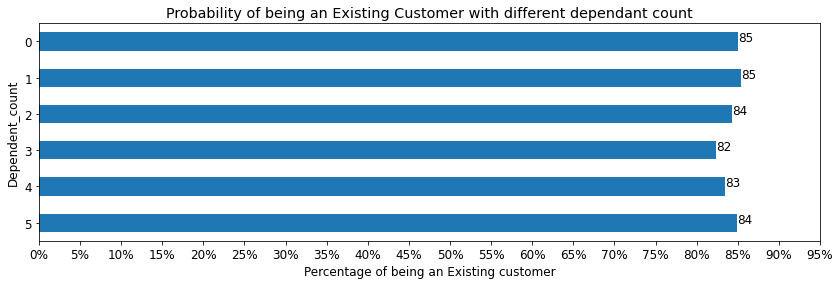

In [22]:
f = df[['Dependent_count','Existing_Customer']].groupby(['Dependent_count']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.xlabel('Percentage of being an Existing customer');
plt.title('Probability of being an Existing Customer with different dependant count');

> There is no trend here at all.

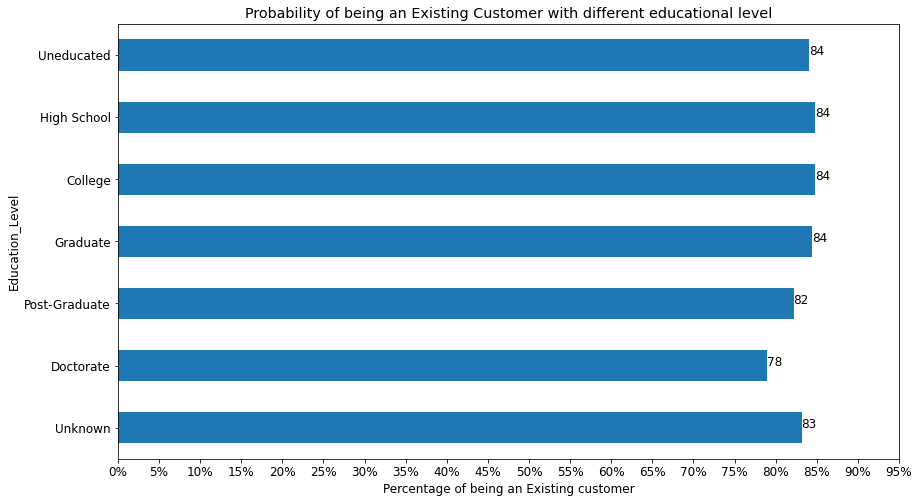

In [23]:
order=['Uneducated','High School' ,'College' ,'Graduate' ,'Post-Graduate' ,'Doctorate' ,'Unknown']
f = df[['Education_Level','Existing_Customer']].groupby(['Education_Level']).mean().loc[order].plot.barh(figsize = [14, 8])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title('Probability of being an Existing Customer with different educational level');

df.Education_Level.value_counts()
plt.xlabel('Percentage of being an Existing customer');

> We can say that any educational level beyond post graduate has lower probability to be an existing customer but still the margin isn't that big to fully assume it's a notable factor.

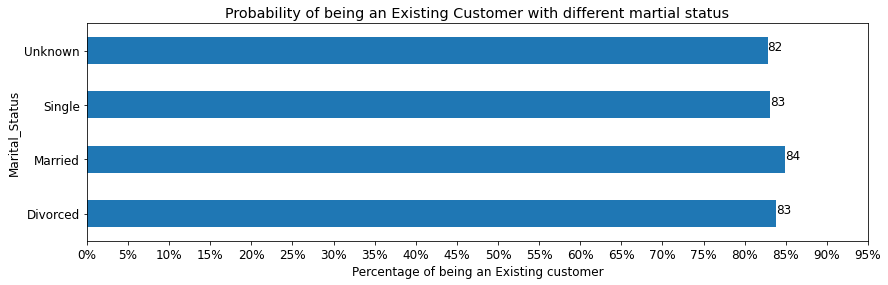

In [24]:
f = df[['Marital_Status','Existing_Customer']].groupby(['Marital_Status']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
plt.legend([],[], frameon=False)

for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
    plt.title('Probability of being an Existing Customer with different martial status');
    plt.xlabel('Percentage of being an Existing customer');

> Nothing notable here.

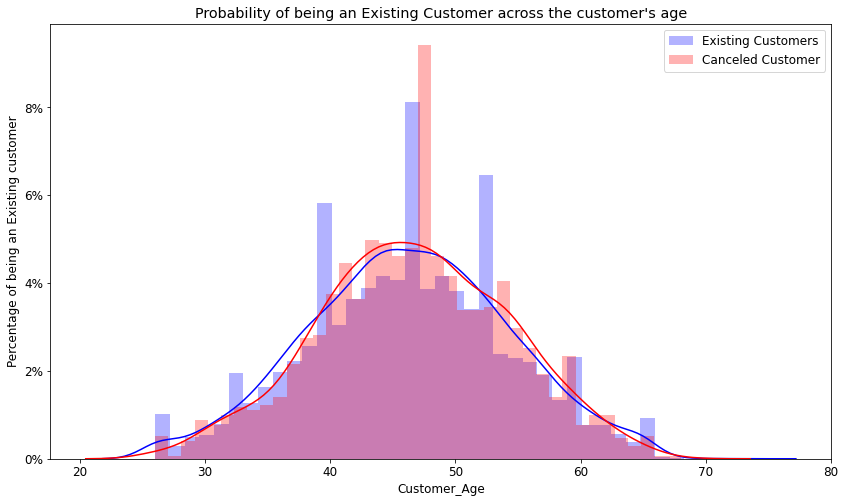

In [25]:
plt.figure(figsize=(14,8))
f = sns.distplot(df[df.Existing_Customer == 1].Customer_Age,bins=40,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Customer_Age,bins=40,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.legend()
plt.title("Probability of being an Existing Customer across the customer's age");
plt.ylabel('Percentage of being an Existing customer');
vals = f.get_yticks()
f.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);

> The density curve is almost identical.

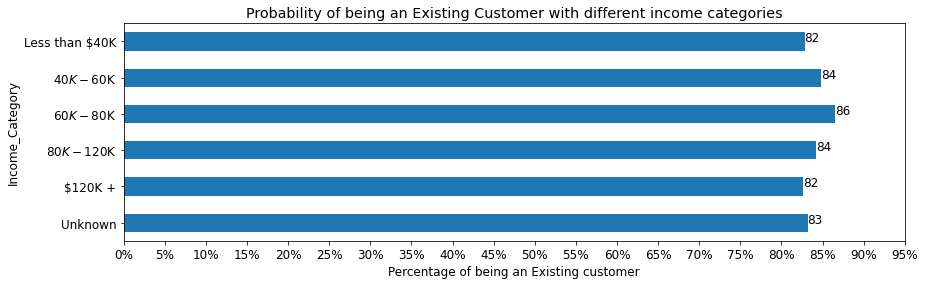

In [26]:
order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown']
f = df[['Income_Category','Existing_Customer']].groupby(['Income_Category']).mean().loc[order].plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title('Probability of being an Existing Customer with different income categories');

df.Income_Category.value_counts()
plt.xlabel('Percentage of being an Existing customer');

> If we ignore the unknown bar we can see that '$60K - $80K' has the lead which is the middle income category and we go further away toward the more fortunate categories or the less fortunate ones the gap expands with less and less possibility that the customer is an existing one.

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

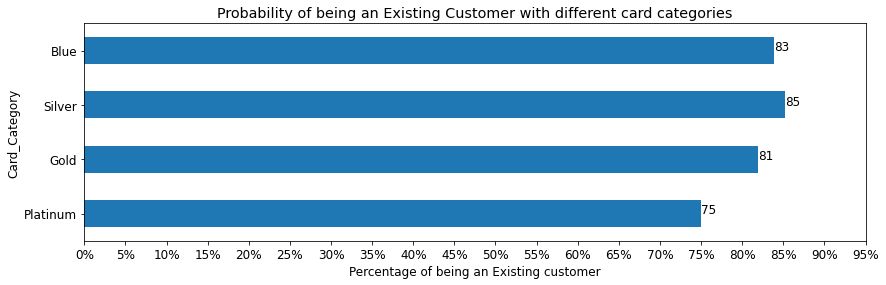

In [27]:
order=['Blue','Silver','Gold', 'Platinum']
f = df[['Card_Category','Existing_Customer']].groupby(['Card_Category']).mean().loc[order].plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title('Probability of being an Existing Customer with different card categories');
plt.xlabel('Percentage of being an Existing customer');
df.Card_Category.value_counts()

> We can clearly see that the more high end the card tier is, the more likely the customer will cancel although the number of higher tier cards is a bit low.

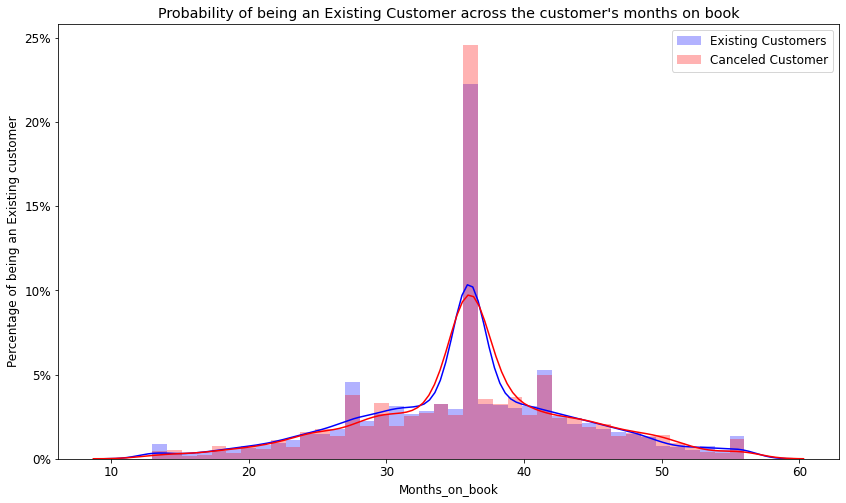

In [28]:
plt.figure(figsize=(14,8))
f = sns.distplot(df[df.Existing_Customer == 1].Months_on_book,bins=40,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Months_on_book,bins=40,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.legend()
plt.title("Probability of being an Existing Customer across the customer's months on book");
vals = f.get_yticks()
f.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);
plt.ylabel('Percentage of being an Existing customer');

> The density curve is almost identical.

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

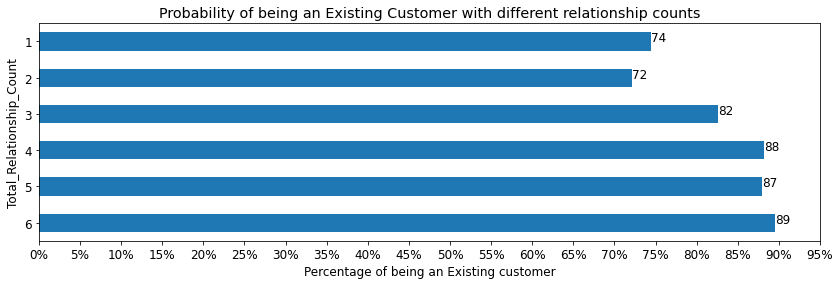

In [29]:
f = df[['Total_Relationship_Count','Existing_Customer']].groupby(['Total_Relationship_Count']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title('Probability of being an Existing Customer with different relationship counts');
plt.xlabel('Percentage of being an Existing customer');

df.Total_Relationship_Count.value_counts()

> We can clearly see that the more relationships with us, the more likely the customer will stay which is intuitive.

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

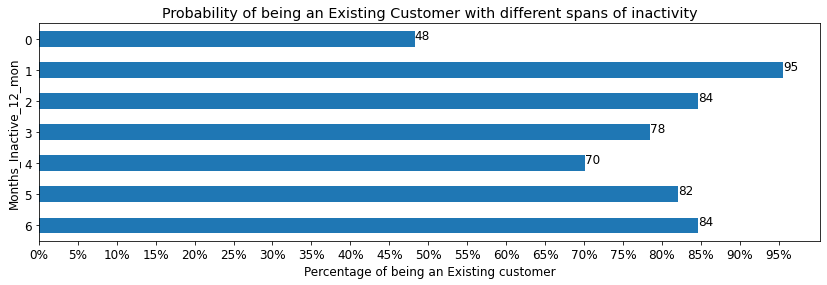

In [30]:
f = df[['Months_Inactive_12_mon','Existing_Customer']].groupby(['Months_Inactive_12_mon']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title("Probability of being an Existing Customer with different spans of inactivity");
plt.xlabel('Percentage of being an Existing customer');

df.Months_Inactive_12_mon.value_counts()

> There is definately a trend here espcially if we ignore all spans with less than 200 occurances as in the next graph.

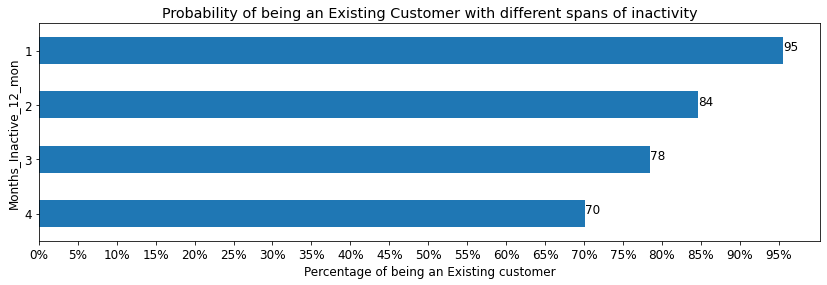

In [31]:
f = df[['Months_Inactive_12_mon','Existing_Customer']].groupby(['Months_Inactive_12_mon']).mean()[1:5].plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title("Probability of being an Existing Customer with different spans of inactivity");
plt.xlabel('Percentage of being an Existing customer');

> Now it's clear that the more months the customer is inactive, the more likely he will leave and with a big margin.

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

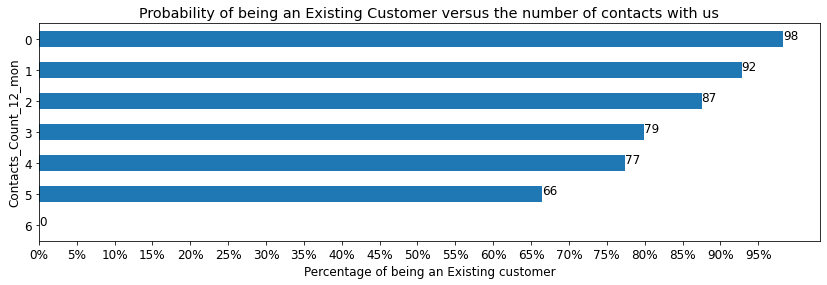

In [32]:
f = df[['Contacts_Count_12_mon','Existing_Customer']].groupby(['Contacts_Count_12_mon']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title("Probability of being an Existing Customer versus the number of contacts with us");
plt.xlabel('Percentage of being an Existing customer');

df.Contacts_Count_12_mon.value_counts()

> And here comes a big statistical significance, the more the customers contacts us the more likely he will leave. 

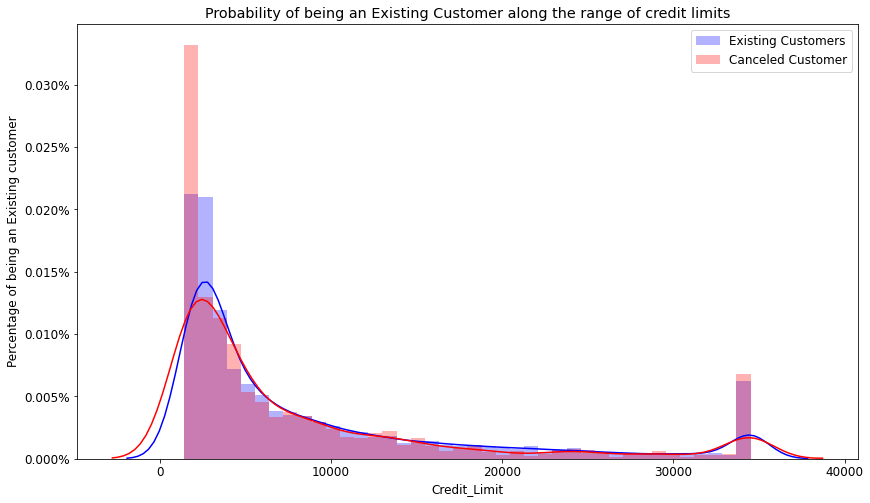

In [33]:
plt.figure(figsize=(14,8))
f = sns.distplot(df[df.Existing_Customer == 1].Credit_Limit,bins=40,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Credit_Limit,bins=40,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.title("Probability of being an Existing Customer along the range of credit limits");
plt.ylabel('Percentage of being an Existing customer');
vals = f.get_yticks()
f.set_yticklabels(['{:,.3%}'.format(x) for x in vals]);
plt.legend();

> The density curve is almost identical.

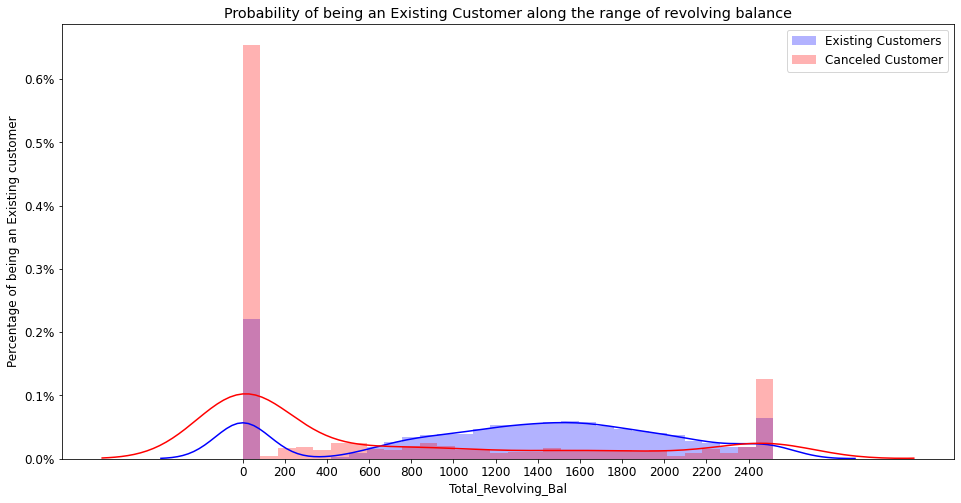

In [34]:
plt.figure(figsize=(16,8))
f = sns.distplot(df[df.Existing_Customer == 1].Total_Revolving_Bal,bins=30,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Total_Revolving_Bal,bins=30,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.xticks((np.arange(min(df.Total_Revolving_Bal), 2600, 200)))
plt.legend();
plt.title("Probability of being an Existing Customer along the range of revolving balance");

plt.ylabel('Percentage of being an Existing customer');
vals = f.get_yticks()
f.set_yticklabels(['{:,.1%}'.format(x) for x in vals]);

> At the lower rannge [0 - 600] probability of canceling was higher, but then from [600 - 2300] the probability is in the favor of being an existing customer.

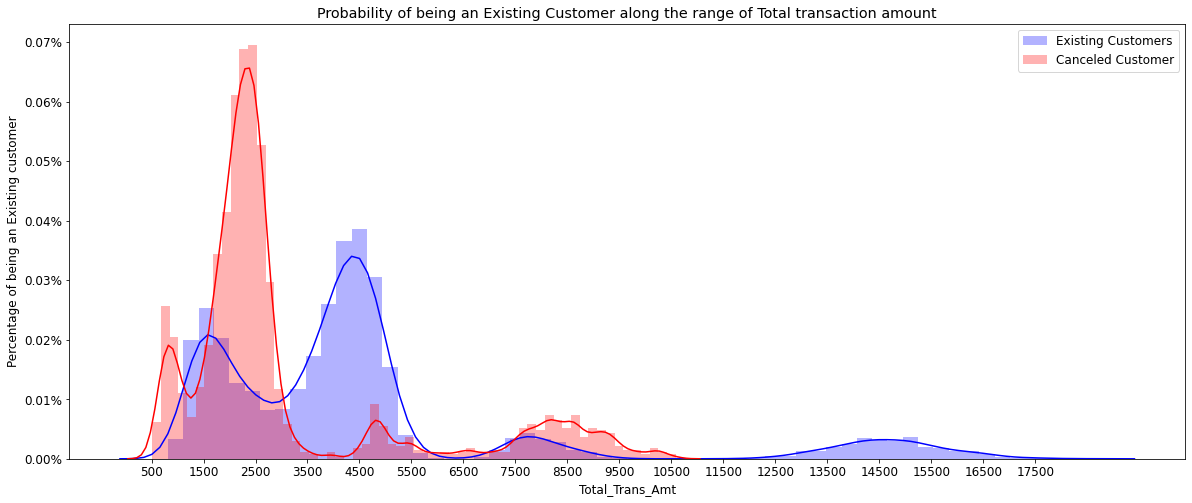

In [35]:
plt.figure(figsize=(20,8))
f = sns.distplot(df[df.Existing_Customer == 1].Total_Trans_Amt,bins=60,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Total_Trans_Amt,bins=60,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.xticks((np.arange(500, max(df.Total_Trans_Amt), 1000)))
plt.legend();
plt.title("Probability of being an Existing Customer along the range of Total transaction amount");
plt.ylabel('Percentage of being an Existing customer');
vals = f.get_yticks()
f.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

> The most notable ranges are from 1500 to 3000 has a high cancellation rate, 3000 to 5500 and starting from 11500 to the end of the range is most probabily an existing customer.

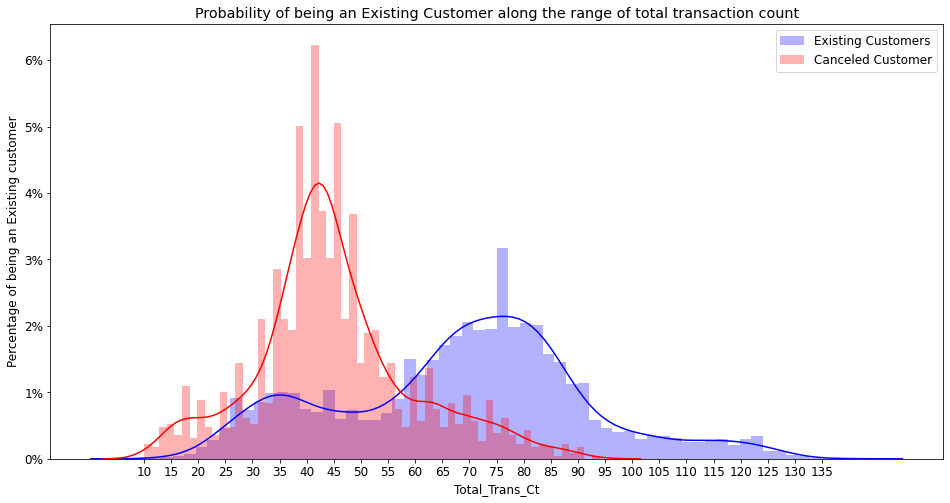

In [36]:
plt.figure(figsize=(16,8))
f = sns.distplot(df[df.Existing_Customer == 1].Total_Trans_Ct,bins=60,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Total_Trans_Ct,bins=60,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.xticks((np.arange(min(df.Total_Trans_Ct), max(df.Total_Trans_Ct), 5)))
plt.legend();
plt.title("Probability of being an Existing Customer along the range of total transaction count");
plt.ylabel('Percentage of being an Existing customer');
vals = f.get_yticks()
f.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);

> The number of transaction has a clean easily distinguished patterns, like from 0 to 55 transactions cancellers are abundant, but starting from 55 until the end of the range it's way higher percentage being an existing customer. So we can certainly say the more transactions the customer makes, the more likely he will stay.

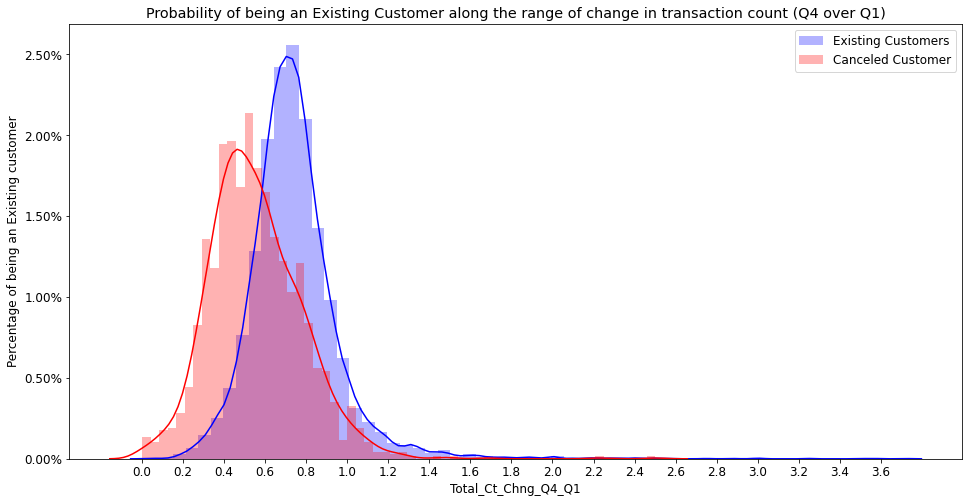

In [37]:
plt.figure(figsize=(16,8))
f = sns.distplot(df[df.Existing_Customer == 1].Total_Ct_Chng_Q4_Q1,bins=60,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Total_Ct_Chng_Q4_Q1,bins=60,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.xticks((np.arange(min(df.Total_Ct_Chng_Q4_Q1), max(df.Total_Ct_Chng_Q4_Q1), 0.2)))
plt.legend();
plt.title("Probability of being an Existing Customer along the range of change in transaction count (Q4 over Q1)");
plt.ylabel('Percentage of being an Existing customer');
vals = f.get_yticks()
f.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals]);

> from 0 to 0.6 'lower bound' it's more likely to be a cancelled account, but from 0.6 to around 1.5 it's an existing account that is abundant.

### Talk about samples of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> So my first observation was how much the demoghraphic features had a very low significance espcially when compared to the features relating to the customer's usage.

> There are 2 approaches now, since we can differntiate which customer is about to cancel: 
>> we can try to win those customers back

>> we can concentrate more on the existing customers and make sure they don't reach the point of canceling in the first place

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Age feature totally has a huge positive correlation with months on book.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

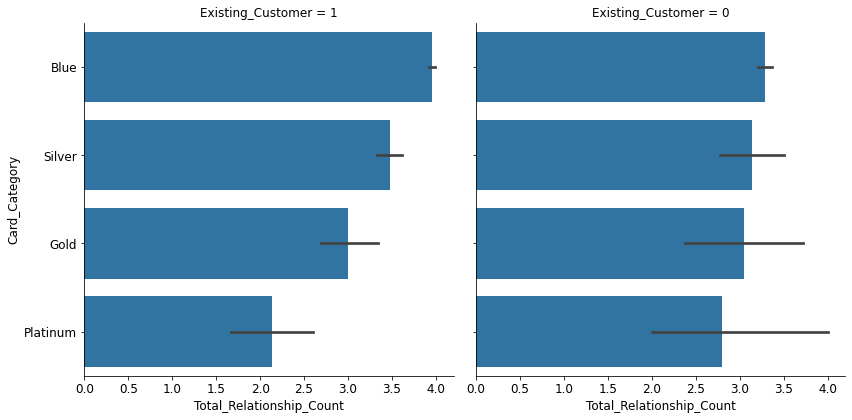

In [38]:
order=['Blue','Silver','Gold', 'Platinum']
g = sns.FacetGrid(data = df, col = 'Existing_Customer', height = 6,col_order=[1,0])
g.map(sns.barplot, 'Total_Relationship_Count', 'Card_Category',order=order);

> Cancelled customers have a further outliers when it comes to total relation count

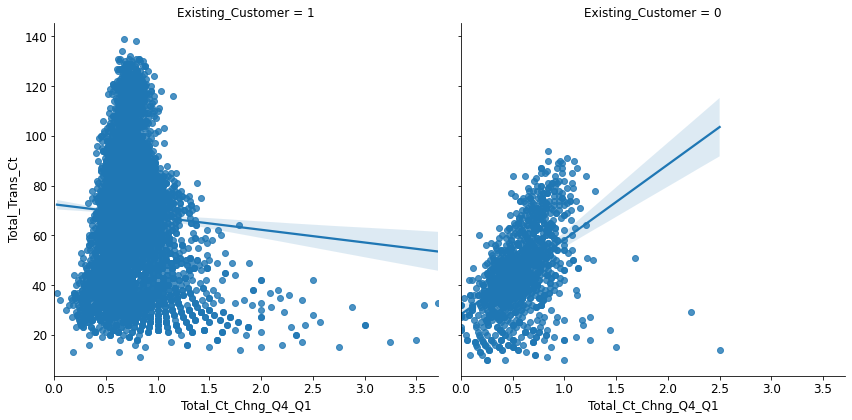

In [39]:
g = sns.FacetGrid(data = df, col = 'Existing_Customer', height = 6, col_order=[1,0])
g.map(sns.regplot, 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct');

> Here we have an inconsistency, when it comes to cancelled customers total transaction count is directly proportional with the total change in count, but it's negativelly proportional in the case of existing customers.

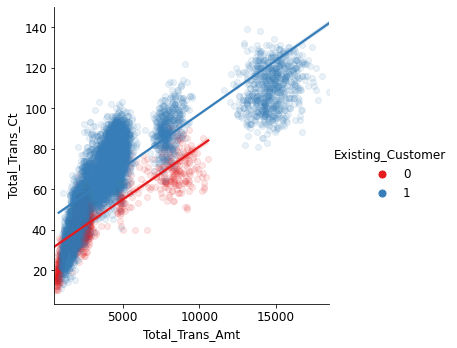

In [40]:
g = sns.lmplot(x="Total_Trans_Amt", y="Total_Trans_Ct", hue="Existing_Customer", data=df,scatter_kws={'alpha':0.1},palette="Set1");

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 

> first the range when it comes to existant customers is much wider in both total transaction amount and total transaction count.

> Both hues have almost the same slope which means the 2 features are consistent in being directly proportional.

In [41]:
#doing some wrangling to create heatmap

EC1 = df[df.Existing_Customer == 1].groupby(['Months_Inactive_12_mon','Contacts_Count_12_mon']).count().Existing_Customer
EC0 = df[df.Existing_Customer == 0].groupby(['Months_Inactive_12_mon','Contacts_Count_12_mon']).count().Existing_Customer

df01 = EC1.to_frame() 
df00 = EC0.to_frame()

df01 = df01.reset_index().pivot(columns='Months_Inactive_12_mon',index='Contacts_Count_12_mon',values='Existing_Customer')
df00 = df00.reset_index().pivot(columns='Months_Inactive_12_mon',index='Contacts_Count_12_mon',values='Existing_Customer')

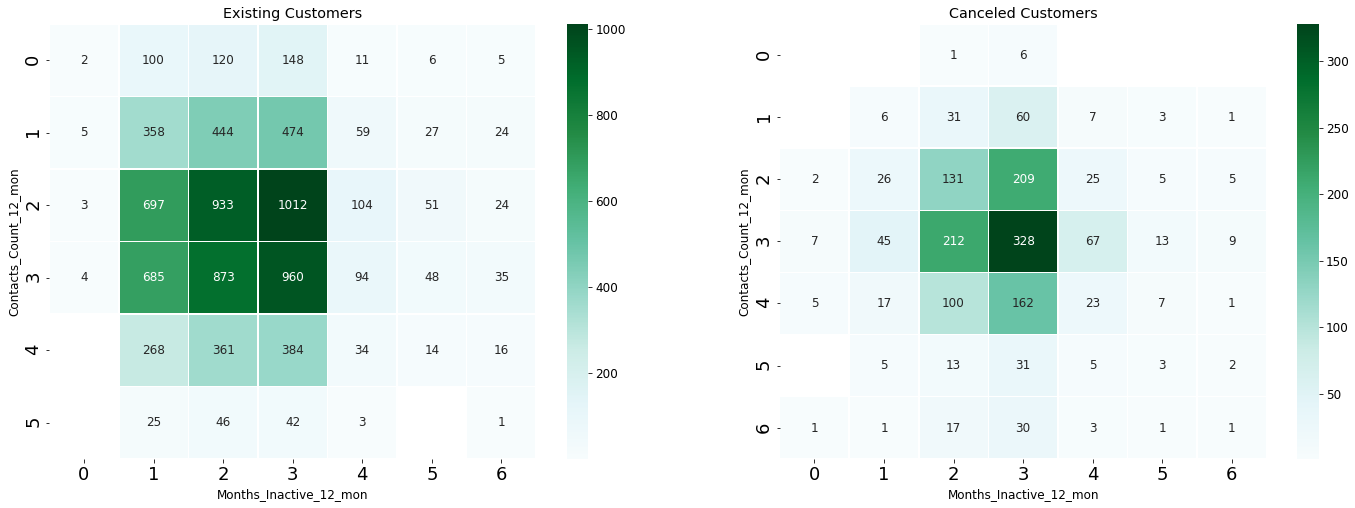

In [42]:
f,ax=plt.subplots(1,2,figsize=(24,8))
sns.heatmap(df01,annot=True ,linewidths=.5, cmap="BuGn",ax=ax[0],fmt='g')
sns.heatmap(df00,annot=True ,linewidths=.5, cmap="BuGn",ax=ax[1],fmt='g')

ax[0].set_yticklabels(ax[0].get_ymajorticklabels(), fontsize = 18)
ax[0].set_xticklabels(ax[0].get_xmajorticklabels(), fontsize = 18)

ax[1].set_yticklabels(ax[1].get_ymajorticklabels(), fontsize = 18)
ax[1].set_xticklabels(ax[1].get_xmajorticklabels(), fontsize = 18)

ax[0].set_title('Existing Customers');
ax[1].set_title('Canceled Customers');

> In the cancelled graph we can see the region with the most cancellation and we go further outside the numbers shrink, so if we need to identify cancellers before hand these would be our best bet if other factors align that they may cancel.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes the heatmap we constructed explained how the bulk of the customers behave and that those are the most in need of extra attention or they may cancel.  

### Were there any interesting or surprising interactions between features?

> The inconsistency when it comes to cancelled customers total transaction count being directly proportional with the total change in count, but it's negativelly proportional in the case of existing customers was a bit surprising to say the least.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'EDA.ipynb'])

0